<a href="https://colab.research.google.com/github/IndigoJones02/Uprooted/blob/main/gentriffication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing


import folium
import requests
from geopy.geocoders import Nominatim
from folium.plugins import MarkerCluster


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
path1 = "/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"     
d1 = pd.read_csv(path1, engine='python',encoding='latin1')  

d1 = pd.DataFrame({'Regionid':d1['RegionID'],
                  'SizeRank': d1['SizeRank'],
                  'Zip':d1['RegionName'],
                  'State': d1['State'],
                  'City': d1['City'],
                  'Metro': d1['Metro'],
                  'CountyName': d1['CountyName'],
                  '2017-12-31': d1['2017-12-31'],
                  '2018-12-31': d1['2018-12-31'],
                  '2019-12-31': d1['2019-12-31'],
                  '2020-12-31': d1['2020-12-31'],
                  '2021-12-31': d1['2021-12-31'],})

for d in range(len(d1)):
    if d1['State'][d] != 'TN':
        d1 = d1.drop([d])
for e in d1.index:
    if d1['City'][e] != 'Nashville':
        d1 = d1.drop([e])
        
avg_pv = []
for h in d1.index:
    avg_pv.append((d1['2017-12-31'][h]+d1['2018-12-31'][h]+d1['2019-12-31'][h]+d1['2020-12-31'][h]+d1['2021-12-31'][h])/5)

# def standard_dev(arr, mean):
#     d = 0
#     for n in arr:
#         d += (n - mean)**2
#     return (d / len(arr)) ** 0.5


# def standardized_norm(arr, mean, std):
#     nums_std = []
#     for n in arr:
#         nums_std.append((n - mean)/std )
#     return nums_std    

# pv = []
# for l in avg_pv:
#     pv.append(l)
# pv_mean = np.mean(pv)

# pv_arr = standardized_norm(pv, pv_mean, standard_dev(pv, pv_mean) )

zips = []
for e in d1.index:
  zips.append(str(d1['Zip'][e]))

d1 = pd.DataFrame({
                  'Zip': zips,
                  'Property Value': avg_pv})
d1 = d1.convert_dtypes()

print(len(d1))


25


In [22]:
path2 = "/GenStats-Nashville - Income Nash.csv"     
d2 = pd.read_csv(path2, engine='python',encoding='latin1')  

# need to convert census tract to str
ct = []
for a in d2['Census Tract']:
    ct.append(str(a))
    
d2 = d2.convert_dtypes()   

# mi = []
# for b in d2['Median Income']:
#     mi.append(b)
# mhinc_mean = np.mean(mi)

# minc = standardized_norm(mi, mhinc_mean, standard_dev(mi, mhinc_mean) )

d2 = pd.DataFrame({'Census Tract ID': ct, 'Median Income': d2['Median Income']})
d2
# print(d2.dtypes)

,Census Tract ID,Median Income
0,47037010103,68019
1,47037010104,102675
2,47037010105,69525
3,47037010106,71656
4,47037010201,70750
...,...,...
163,47037019402,94065
164,47037019501,63523
165,47037019502,69907
166,47037019503,91917


In [21]:
path3 = "/GenStats-Nashville - Diversity Index.csv"     
d3 = pd.read_csv(path3)  

# arr = np.array([d3['D-Index']])
# ar = preprocessing.normalize(arr)
d3 = pd.DataFrame({'Census Tract ID': ct, 'Diversity Index': d3['D-Index']})
d3 = d3.convert_dtypes()

display(d3)

# # need to convert census tract to str

,Census Tract ID,Diversity Index
0,47037010103,23.38
1,47037010104,28.01
2,47037010105,46.07
3,47037010106,46.84
4,47037010201,62.44
...,...,...
163,47037019402,32.01
164,47037019501,37.88
165,47037019502,47.04
166,47037019503,27.49


In [11]:
path4 = "/GenStats-Nashville - Predom Demographic Nash.csv"     
d4 = pd.read_csv(path4)  
ct2 = []
for c in d4['Census Tract']:
    ct2.append(str(c))
d4 = pd.DataFrame({'Census Tract ID': ct2, 'PreDom Race': d4['Predom Race']})
d4

,Census Tract ID,PreDom Race
0,47037010103,white
1,47037010104,white
2,47037010105,black
3,47037010106,black
4,47037010201,white
...,...,...
165,47037019402,white
166,47037019501,white
167,47037019502,white
168,47037019503,white


In [12]:
path5 = "/ZIP_TRACT_122020.xlsx"     
d5 = pd.read_excel(path5)  

def dtype_conversion2(df, col):
    
    df[col] = df[col].astype(str)
    for i, cell in enumerate(df[col]):
        size = len(cell)
        if size < 5:            
            df[col][i] =  ((5-size) * '0') + cell
    return df.convert_dtypes()

ct3 = []
for g in d5.index:
    ct3.append(str(d5['TRACT'][g]))
d5 = dtype_conversion2(d5, 'ZIP')

d5 = pd.DataFrame({'Zip': d5['ZIP'], 'Census Tract ID': ct3})
print(d5.dtypes)

<ipython-input-12-8d36b2f2eb0d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i] =  ((5-size) * '0') + cell


Zip                string
Census Tract ID    object
dtype: object


In [ ]:
# Merge diversity, income and race = A
# merge A with zip = B
# Merge B with zillow = C


g


In [25]:
di_mi = pd.merge(d2, d3, on=["Census Tract ID"])
gen_facts = pd.merge(di_mi, d4, on=['Census Tract ID'])
display(gen_facts)

,Census Tract ID,Median Income,Diversity Index,PreDom Race
0,47037010103,68019,23.38,white
1,47037010104,102675,28.01,white
2,47037010105,69525,46.07,black
3,47037010106,71656,46.84,black
4,47037010201,70750,62.44,white
...,...,...,...,...
163,47037019402,94065,32.01,white
164,47037019501,63523,37.88,white
165,47037019502,69907,47.04,white
166,47037019503,91917,27.49,white


In [26]:
gen_facts_zip = pd.merge(gen_facts, d5, on=["Census Tract ID"])
# gen_facts_zip = gen_facts_zip.groupby('Zip')
# display(gen_facts_zip.first())

pv_gen_stats = pd.merge(gen_facts_zip, d1, on=["Zip"])
# gen_facts_zip
pv_gen_stats
print(len(set(gen_facts_zip['Zip'])))
print(len(set(pv_gen_stats['Zip'])))

42
23


In [45]:
from pandas.core.dtypes.cast import convert_dtypes
zc_dict = {}
cc = 1
for z in set(gen_facts_zip['Zip']):
  if z not in zc_dict:
    zc_dict[z] = cc
    cc += 1

zc = []
for zd in gen_facts_zip['Zip']:
  zc.append(zc_dict[zd])

gen_facts_zip['Z-Color'] = zc

gen_facts_zip = gen_facts_zip.convert_dtypes()

In [162]:

colours = ['blue', 'yellow', 'green', 'red', 'black','pink',
            'orange', 'gold', 'cyan', 'grey', 'pale green', 'purple',
           'maroon', 'darkkhaki', 'lime', 'darkgoldenrod', 'peachpuff'
           'lightseagreen', 'snow', 'magenta', 'lightsteelblue','yellowgreen']
pc_dict = {}
cc = 1
carr = 0
for p in set(pv_gen_stats['Zip']):
  if p not in pc_dict:
    pc_dict[p] = cc
    cc += 1

pc = []
for pvc in pv_gen_stats['Zip']:
  pc.append(pc_dict[pvc])

pv_gen_stats['P_Color'] = pc




pv_gen_stats = pv_gen_stats.convert_dtypes()
pv = pv_gen_stats.drop(['PreDom Race', 'Census Tract ID'], axis=1)
genz = gen_facts_zip.drop(['Census Tract ID', 'PreDom Race'], axis=1)
no_zip = pv_gen_stats.drop(['Zip'], axis=1)


zip_dict1 = {}
y1 = 0
for x1 in genz.index:
  if genz['Zip'][x1] not in zip_dict1:
    zip_dict1[genz['Zip'][x1]] = [x1, y1+1]
    y1 = 0
  else:
    ind = zip_dict1[genz['Zip'][x1]][0]
    tot = zip_dict1[genz['Zip'][x1]][1]

    genz['Median Income'][ind] += genz['Median Income'][x1]
    genz['Diversity Index'][ind] += genz['Diversity Index'][x1]
    genz['Z-Color'][ind] += genz['Z-Color'][x1]

    zip_dict1[genz['Zip'][x1]][1] += 1

    genz = genz.drop([x1])

for vals in zip_dict1.values():
   indx = vals[0]
   total = vals[1]

   genz['Median Income'][indx] = int(genz['Median Income'][indx] / total)
   genz['Diversity Index'][indx] /= total
   genz['Z-Color'][indx] /= total

# display(genz)

zip_dict = {}
y = 0
for x in pv.index:
  if pv['Zip'][x] not in zip_dict:
    zip_dict[pv['Zip'][x]] = [x, y+1]
    y = 0
  else:
    ind = zip_dict[pv['Zip'][x]][0]
    tot = zip_dict[pv['Zip'][x]][1]

    pv['Median Income'][ind] += pv['Median Income'][x]
    pv['Diversity Index'][ind] += pv['Diversity Index'][x]
    pv['Property Value'][ind] += pv['Property Value'][x]
    pv['P_Color'][ind] += pv['P_Color'][x]

    zip_dict[pv['Zip'][x]][1] += 1

    pv = pv.drop([x])

for valss in zip_dict.values():
   index = valss[0]
   totall = valss[1]

   pv['Median Income'][index] = int(pv['Median Income'][index] / totall)
   pv['Diversity Index'][index] /= totall
   pv['Property Value'][index] /= totall
   pv['P_Color'][index] /= totall

# display(pv)
display(no_zip)
cti = no_zip['Census Tract ID']
pr = no_zip['PreDom Race']

zp = pv['Zip']
zp2 = genz['Zip']
# pv_gen_stats

,Census Tract ID,Median Income,Diversity Index,PreDom Race,Property Value,P_Color
0,47037010103,2121519,583.58,white,5467067.919248,42
1,47037010104,102675,28.01,white,260336.567583,21
2,47037013100,84013,58.6,white,260336.567583,21
3,47037010103,68019,23.38,white,270643.12701,18
4,47037010104,102675,28.01,white,270643.12701,18
...,...,...,...,...,...,...
218,47037018407,117740,30.1,white,347227.732327,3
219,47037018408,111500,27.15,white,347227.732327,3
220,47037018409,71458,36.41,white,347227.732327,3
221,47037018410,60141,40.76,white,347227.732327,3


In [83]:
no_zip = no_zip.drop(['PreDom Race', 'Census Tract ID'], axis=1)
f = [	'Median Income',	'Diversity Index',	'Property Value']
no_zip[f] = (no_zip[f]-no_zip[f].mean()) / no_zip[f].std()
no_zip['Census Tract ID'] = cti
no_zip['PreDom Race'] = pr

no_zip = no_zip.convert_dtypes()

In [163]:
pv = pv.drop(['Zip'], axis=1)
f = [	'Median Income',	'Diversity Index',	'Property Value']
pv[f] = (pv[f]-pv[f].mean()) / pv[f].std()
pv['Zip'] = zp
pv

,Median Income,Diversity Index,Property Value,P_Color,Zip
0,4.486612,4.339172,4.19691,21,37080
3,-0.224641,-0.221339,-0.45222,18,37189
10,-0.363045,-0.262204,-0.568988,10,37218
17,-0.269228,-0.049827,-0.536888,6,37207
31,-0.381257,0.277318,-0.586995,19,37115
41,-0.284855,-0.01153,-0.466785,20,37138
47,-0.289747,-0.086077,-0.299809,15,37216
57,-0.079166,-0.267831,-0.109715,2,37206
66,-0.221498,-0.398432,-0.172549,9,37209
76,-0.474202,-0.257067,-0.346717,16,37208


In [67]:
genz = genz.drop(['Zip'], axis=1)
f2 = [	'Median Income',	'Diversity Index']
genz[f2] = (genz[f2]-genz[f2].mean()) / genz[f2].std()
genz['Zip'] = zp2
genz

,Median Income,Diversity Index,Z-Color,Zip
0,1.156733,1.510544,8,37072
1,4.88722,3.412186,91,37080
2,-0.261381,-0.188275,36,37189
3,0.062698,-0.231453,19,37015
7,-0.613714,-0.269813,22,37218
9,-0.374886,0.153936,13,37207
12,-0.660076,0.806677,37,37115
16,-0.022226,-0.803552,9,37073
20,-0.414667,0.230349,38,37138
27,-0.427121,0.081608,32,37216


##PCA for ```pv_gen-stats```



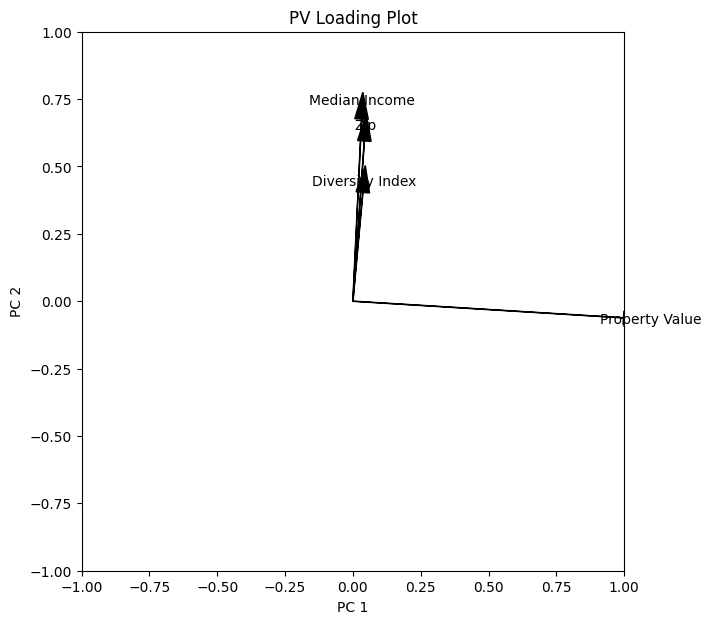

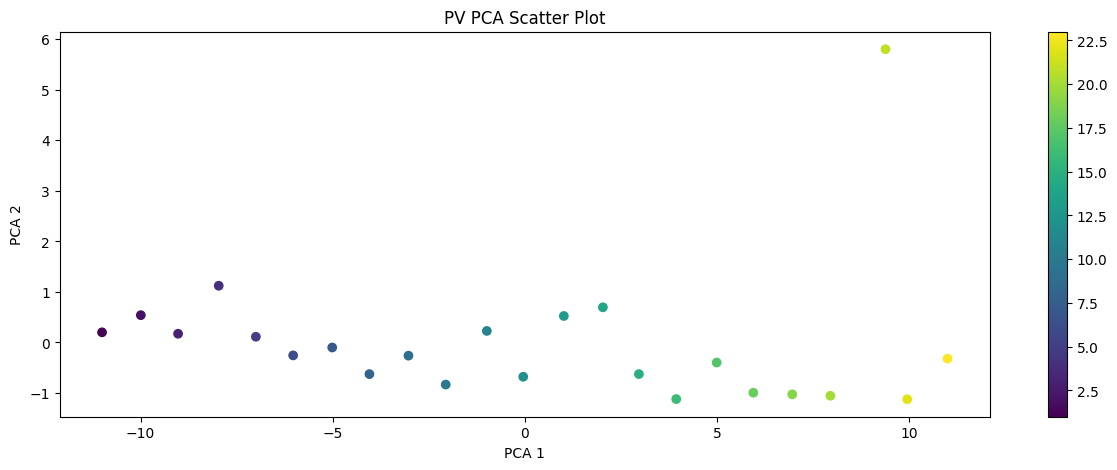

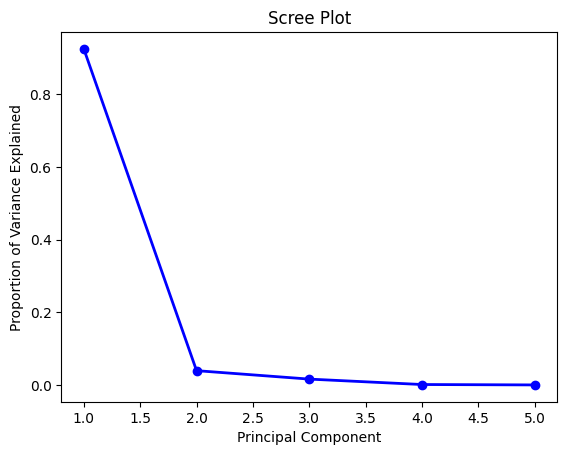

In [63]:
from sklearn.decomposition import PCA

# pca = PCA(n_components=pv_gen_stats.shape[1])
pca = PCA(n_components=pv.shape[1])
pca1 = PCA(n_components=2)

# gen_encoded = pd.get_dummies(pv_gen_stats, columns=['PreDom Race', 'Zip', 'Census Tract ID'])

gen_encoded = pd.get_dummies(pv, columns=['Zip'])
pca.fit(gen_encoded)
loadings = pca.components_

# Loading Plot
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title('PV Loading Plot')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
for i, feature in enumerate([	'Median Income',	'Diversity Index','Zip',	'Property Value']):
    ax.arrow(0, 0, loadings[0, i], loadings[1, i], head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.text(loadings[0, i]*1.1, loadings[1, i]*1.1, feature, ha='center', va='center')
plt.show()


# Scatter Plot
_pca = pca1.fit_transform(gen_encoded)
z_arr = np.random.randint(1,22,size=(210, 1))

fig, ax = plt.subplots(figsize=(15, 5))
# plt.scatter(_pca[:, 0], _pca[:, 1], c=pv_gen_stats['P_Color'])
plt.scatter(_pca[:, 0], _pca[:, 1], c=pv['P_Color'])
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_title('PV PCA Scatter Plot')
plt.colorbar()
plt.show()


# Scree plot
variance_ratios = pca.explained_variance_ratio_

fig5, ax5 = plt.subplots()
ax5.plot(range(1, len(variance_ratios) + 1), variance_ratios, 'bo-', linewidth=2)
ax5.set_title('Scree Plot')
ax5.set_xlabel('Principal Component')
ax5.set_ylabel('Proportion of Variance Explained')
plt.show()
# LDA supervised 

## PCA for `gen_facts`

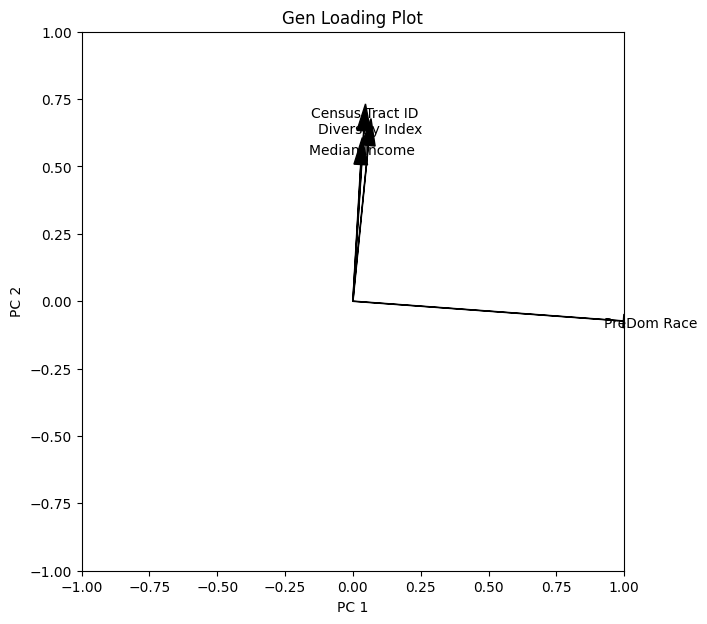

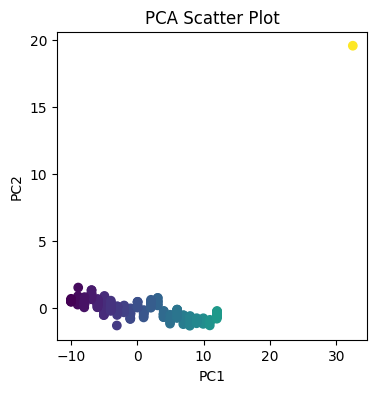

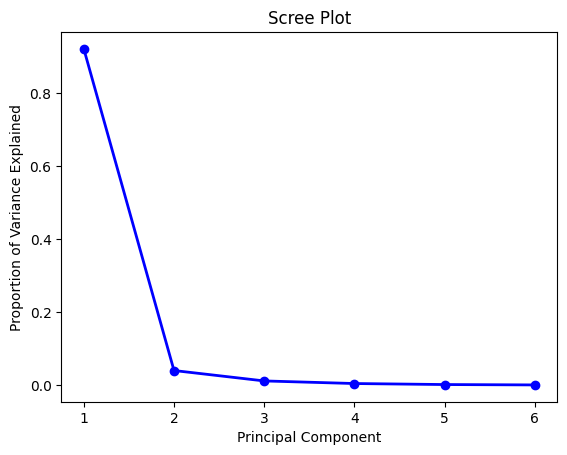

In [88]:
# pca = PCA(n_components=gen_facts_zip.shape[1])
# pca = PCA(n_components=genz.shape[1])
pca = PCA(n_components=no_zip.shape[1])
pca2 = PCA(n_components=2)

# features = ['Census Tract ID',	'Median Income',	'Diversity Index',	'PreDom Race',	'Zip']
# features = ['Median Income',	'Diversity Index',	'Zip']
features = ['Census Tract ID',	'Median Income',	'Diversity Index',	'PreDom Race']

gen_encoded = pd.get_dummies(no_zip, columns=[features[0], features[3]])
# gen_encoded = pd.get_dummies(genz, columns=[features[2]])

_pca = pca2.fit_transform(gen_encoded)
pca.fit(gen_encoded)
loadings = pca.components_

# Loading Plot
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_title('Gen Loading Plot')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')

for i, feature in enumerate(features):
    ax.arrow(0, 0, loadings[0, i], loadings[1, i], head_width=0.05, head_length=0.1, fc='k', ec='k')
    ax.text(loadings[0, i]*1.1, loadings[1, i]*1.1, feature, ha='center', va='center')
plt.show()


# Scatter Plot
fig2, ax2 = plt.subplots(figsize=(4, 4))
plt.scatter(_pca[:, 0], _pca[:, 1], c=no_zip['P_Color'])
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_title('PCA Scatter Plot')
plt.show()

# Scree plot
variance_ratios = pca.explained_variance_ratio_

fig4, ax4 = plt.subplots()
ax4.plot(range(1, len(variance_ratios) + 1), variance_ratios, 'bo-', linewidth=2)
ax4.set_title('Scree Plot')
ax4.set_xlabel('Principal Component')
ax4.set_ylabel('Proportion of Variance Explained')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


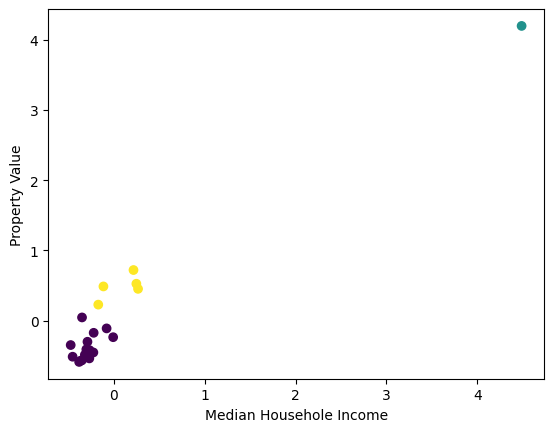

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [168]:
# from kmodes.kmodes import KModes
from sklearn.cluster import KMeans


k = 3
kmeans = KMeans(n_clusters=k)
f = [	'Median Income',	'Diversity Index',	'Property Value']
kmeans.fit(pv[f])

# split data for traing and testing
# gather predictions and place on a map
# ask chat gpt ()
pv['cluster'] = kmeans.labels_

plt.scatter(pv['Median Income'], pv['Property Value'], c=pv['cluster'], cmap='viridis')
plt.xlabel('Median Househole Income')
plt.ylabel('Property Value')
plt.show()


# plt.scatter(pv['Median Income'], pv['Diversity Index'], c=pv['cluster'], cmap='viridis')
# plt.xlabel('Median Househole Income')
# plt.ylabel('Diversity')
# plt.show()

# plt.scatter(pv['Property Value'], pv['Diversity Index'], c=pv['cluster'], cmap='viridis')
# plt.xlabel('Median Househole Income')
# plt.ylabel('Diversity')
# plt.show()
model = KMeans(n_clusters=3, random_state=42).fit(pv[f])

pv['pred'] = model.predict(pv[f])


geoloc = Nominatim(user_agent='my-app')
pv['location'] = pv['Zip'].apply(lambda x: geoloc.geocode({'postalcode':x, 'country':'USA'}))

pv['latitude'] = pv['location'].apply(lambda x: x.latitude if x else None)
pv['longitude'] = pv['location'].apply(lambda x: x.longitude if x else None)


map = folium.Map(location=[36.1627,-86.7816], zoom_start=12)

for i in range(k):
  cpv = pv[pv['cluster'] == i]
  markers = MarkerCluster().add_to(map)

  for idx, row in cpv.iterrows():
    if row['pred'] == 2:
        folium.Marker(location=[row['latitude'], row['longitude']],
                      icon=folium.Icon(color='red')).add_to(map)
    elif row['pred'] == 0:
        folium.Marker(location=[row['latitude'], row['longitude']],
                      icon=folium.Icon(color='blue')).add_to(map)
    else:
        folium.Marker(location=[row['latitude'], row['longitude']],
                      icon=folium.Icon(color='white')).add_to(map)
map
# display(pv)

In [120]:
# k = 4
# kmeans = KMeans(n_clusters=k)
# f = [	'Median Income',	'Diversity Index']
# kmeans.fit(genz[f])
# genz['cluster'] = kmeans.labels_



# plt.scatter(genz['Median Income'], genz['Diversity Index'], c=genz['cluster'], cmap='viridis')
# plt.xlabel('Median Househole Income')
# plt.ylabel('Diversity')
# plt.show()



In [119]:

# k = 5
# kmeans = KMeans(n_clusters=k)
# f = [	'Median Income',	'Diversity Index',	'Property Value',]
# # kmeans.fit(pv[f])
# kmeans.fit(no_zip[f])
# no_zip['cluster'] = kmeans.labels_

# plt.scatter(no_zip['Median Income'], no_zip['Property Value'], c=no_zip['cluster'], cmap='viridis')
# plt.xlabel('Median Househole Income')
# plt.ylabel('Property Value')
# plt.show()


# plt.scatter(no_zip['Median Income'], no_zip['Diversity Index'], c=no_zip['cluster'], cmap='viridis')
# plt.xlabel('Median Househole Income')
# plt.ylabel('Diversity')
# plt.show()

# plt.scatter(no_zip['Property Value'], no_zip['Diversity Index'], c=no_zip['cluster'], cmap='viridis')
# plt.xlabel('Property Value')
# plt.ylabel('Diversity')
# plt.show()

In [155]:
# import folium
# import requests
# from geopy.geocoders import Nominatim
# from folium.plugins import MarkerCluster


# geoloc = Nominatim(user_agent='my-app')
# pv['location'] = pv['Zip'].apply(lambda z: geoloc.geocode({'postalcode':x, 'country':'USA'}))

# pv['latitude'] = pv['location'].apply(lambda x: x.latitude if x else None)
# pv['longitude'] = pv['location'].apply(lambda x: x.longitude if x else None)
# pv.dropna(subset=['latitude', 'longitude'], inplace=True)

# map = folium.Map(location=[36.1627,-86.7816], zoom_start=12)

# for i in range(k):
#   cpv = pv[pv['cluster'] == i]
#   markers = MarkerCluster().add_to(map)

#   for idx, row in cpv.iterrows():
#     if row['pred'] == 2:
#         folium.Marker(location=[row['latitude'], row['longitude']],
#                       icon=folium.Icon(color='red')).add_to(map)
#     else:
#         folium.Marker(location=[row['latitude'], row['longitude']],
#                       icon=folium.Icon(color='blue')).add_to(map)
# display(pv)

,Median Income,Diversity Index,Property Value,P_Color,Zip,cluster,pred,location,latitude,longitude
